## PLL simulation
by Leo Nabil

April 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Plotting Functions
def plottingComplex(y, label):
    fig, ax1 = plt.subplots(figsize=(10,8))
    ax1.plot(time*1e3, y.real, label='Real', color='b')
    ax1.plot(time*1e3, y.imag, label='Imag', color='r')
    ax1.set_ylabel('Amplitude')
    ax1.set_xlabel('Time [ms]')
    ax1.grid()
    ax1.set_title(label)
    ax1.legend()
    
def plottingReal1(title, y1, label1):  
    fig, ax1 = plt.subplots(figsize=(10,8))
    ax1.plot(time*1e3, y1, color='red')    
    ax1.set_ylabel(label1, color='red')
    ax1.set_xlabel('time [ms]')
    ax1.grid()
    ax1.set_title(title)    

def plottingReal(title, y1, label1, y2, label2):  
    fig, ax1 = plt.subplots(figsize=(10,8))
    ax2 = ax1.twinx()
    ax1.plot(time*1e3, y1, color='red')    
    ax1.set_ylabel(label1, color='red')
    ax1.set_xlabel('time [ms]')
    ax1.grid()
    ax1.set_title(title)    
    ax2.plot(time*1e3, y2, color='blue')
    ax2.set_ylabel(label2, color='blue')

In [32]:
# Parameters

fs = 100e3
numberSamples = 200
freq1 = 1e3
freq2 = 2e3
froff = 25e3
phaseJump = True

# debug
debug = True

# loop parameters
thetha = 5 * np.pi/100;
etha = np.sqrt(2)/2;
kp = 4 * etha * thetha / (1 + 2 * etha * thetha + np.power(thetha, 2))
ki = 4 * np.power(thetha, 2) / (1 + 2 * etha * thetha + np.power(thetha, 2))
if debug:
    print('kp = ', kp, ' ki = ', ki)

kp =  0.35633768324352416  ki =  0.07915833065527669


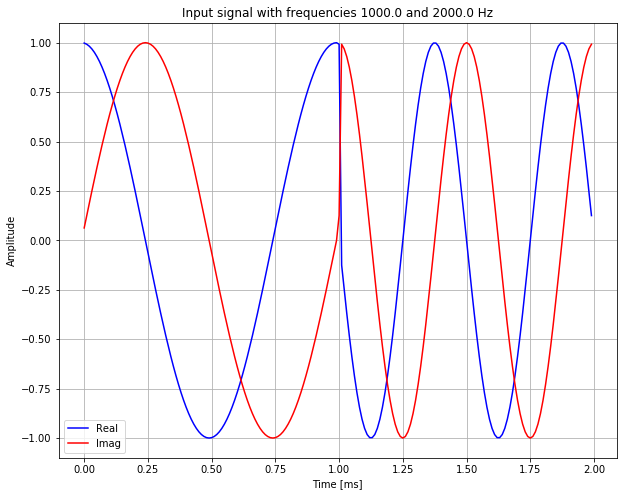

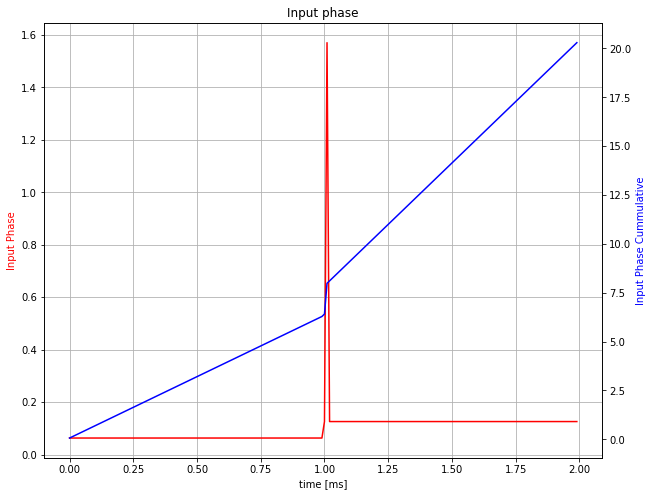

In [28]:
# Input signal
debug = True
time = np.arange(0, numberSamples)/fs

if (phaseJump):
    phase1 = 2 * np.pi * freq1/fs * np.ones(int(numberSamples/2))
    phase2 = 2 * np.pi * freq2/fs * np.ones(int(numberSamples/2))
    phase2[1] = (2 * np.pi * froff/fs)
    phaseIn = np.concatenate((phase1, phase2), axis=0)
    signalIn = np.exp(1j * phaseIn.cumsum())
        
else:
    phaseIn = np.concatenate((2 * np.pi * freq1/fs * np.ones(int(numberSamples/2)), 
                              2 * np.pi * freq2/fs * np.ones(int(numberSamples/2))),
                              axis=0)
    signalIn = np.exp(1j * phaseIn.cumsum())


if debug:
    plottingComplex(signalIn, f'Input signal with frequencies {freq1} and {freq2} Hz')
    plottingReal('Input phase', phaseIn, 'Input Phase', phaseIn.cumsum(), 'Input Phase Cummulative')

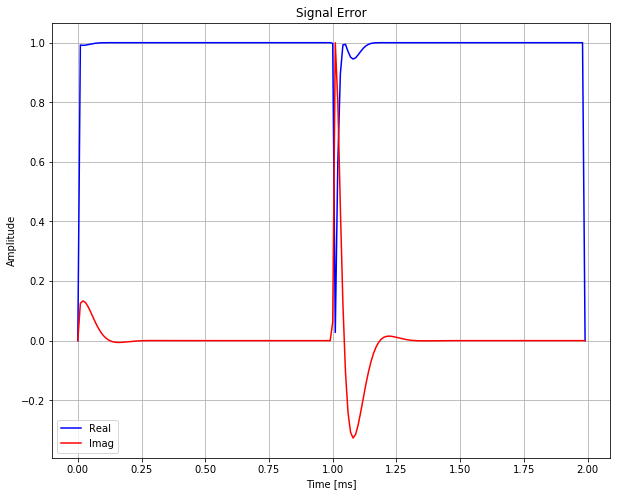

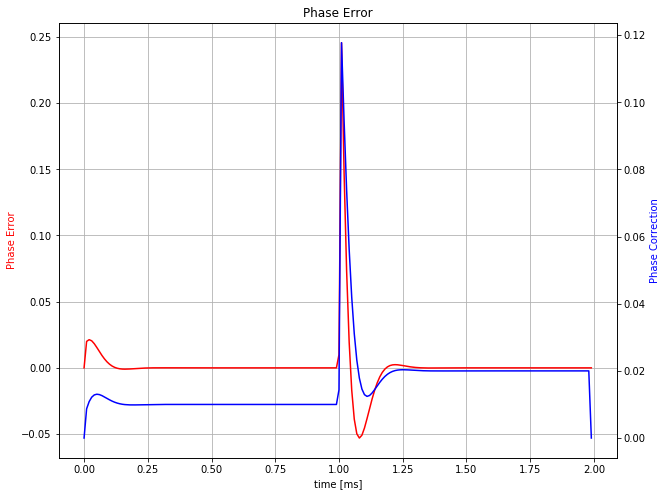

In [33]:
# PLL Filter Loop

# initializing variables
signalOut   = np.zeros(signalIn.size)+1j*np.zeros(signalIn.size)
signalError = np.zeros(signalIn.size)+1j*np.zeros(signalIn.size)
phaseOut   = np.zeros(phaseIn.size)
phaseError = np.zeros(phaseIn.size)
phaseCorr  = np.zeros(phaseIn.size)
intePath = 0
phaseOutAcc = np.zeros(phaseIn.size)

for idx in range(signalIn.size-1):
    # Phase error calculation
    signalError[idx] = signalIn[idx] * signalOut[idx].conjugate()
    #phaseError[idx] = phaseCal(signalError[idx])
    phaseError[idx] = np.angle(signalError[idx])/(2*np.pi)
    # Proportional and integral path
    propPath = kp * phaseError[idx]
    intePath = ki * phaseError[idx] + intePath
    # Output phase
    phaseCorr[idx] = propPath + intePath
    # Output phase accumulator
    phaseOut[idx+1] = phaseCorr[idx]
    phaseOutAcc[idx+1] = phaseOut[idx+1] + phaseOutAcc[idx]
    signalOut[idx+1] = np.exp(1j * 2 * np.pi * phaseOutAcc[idx+1])

if debug:
    plottingComplex(signalError, 'Signal Error')
    plottingReal('Phase Error', phaseError, 'Phase Error', phaseCorr, 'Phase Correction')

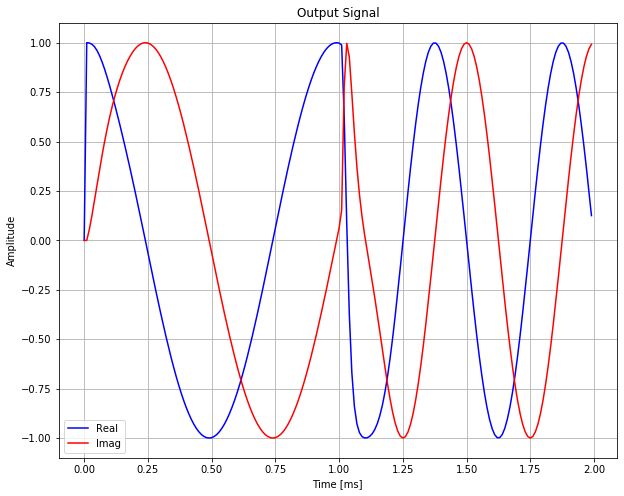

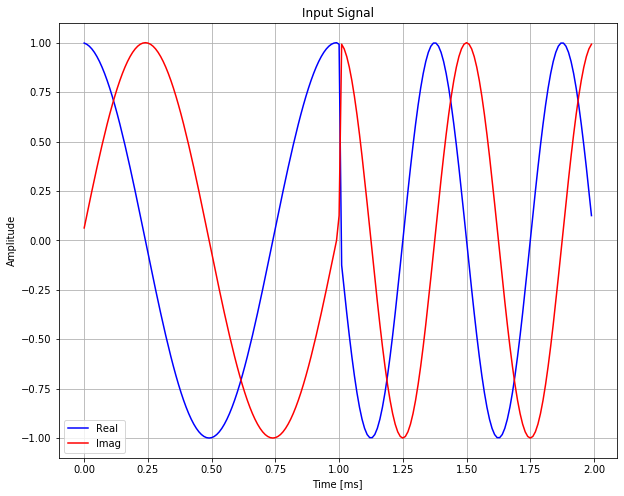

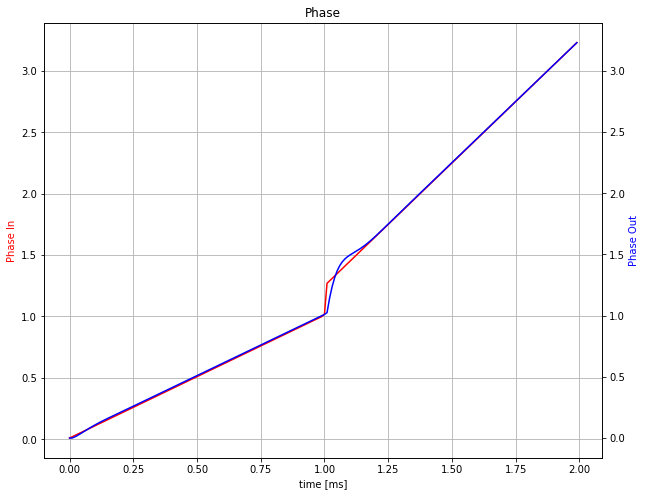

In [34]:
# Ploting Signals
plottingComplex(signalOut, 'Output Signal')
plottingComplex(signalIn, 'Input Signal')
if debug:
    plottingReal('Phase', phaseIn.cumsum()/(2*np.pi), 'Phase In', phaseOut.cumsum(), 'Phase Out')